In [3]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
from video_2_frames import video2frames

In [4]:
plt.rcParams['figure.figsize']=(80,10)

In [5]:
with open('../track-stub/twp-tracks-3.pkl','rb') as ll:
    tracks=pickle.load(ll)

In [6]:
with open('frames-1q-5(10fps).pkl','rb') as load:
    frame_dit=pickle.load(load)

In [7]:
frames_left=frame_dit['left']
frames_right=frame_dit['right']

In [8]:
track_id_dict={}
for frame_num,player_tracks in enumerate(tracks['players']):
    for track_id,values in player_tracks.items():
        track_id_dict[track_id]={}

In [9]:
for frame_num,player_tracks in enumerate(tracks['players']):
    for track_id,values in player_tracks.items():
        if len(values)>40:
            values=values[:30]
            continue
        bbox=values['bbox']
        if values['pitch_side']=='left':
            track_id_dict[track_id][frame_num]=cv2.cvtColor(frames_left[frame_num][round(bbox[1]):round(bbox[3]),
                                                                        round(bbox[0]):round(bbox[2])],
                                                                        cv2.COLOR_BGR2RGB)
        if values['pitch_side']=='right':
            track_id_dict[track_id][frame_num]=cv2.cvtColor(frames_right[frame_num][round(bbox[1]):round(bbox[3]),
                                                                        round(bbox[0]):round(bbox[2])],
                                                                        cv2.COLOR_BGR2RGB)

In [10]:
track_id_dict.keys()

dict_keys([1, 2, 3, 4, 77, 78, 79, 80, 76, 82, 83, 86, 88, 5, 6, 7, 8, 9, 10, 90, 91, 92, 94, 95, 98, 100, 96, 103, 11, 104, 13, 12, 14, 15, 106, 19, 20, 111, 109, 112, 113, 115, 116, 22, 23, 26, 24, 118, 121, 123, 124, 28, 117, 29, 126, 127, 128, 32, 129, 33, 34, 39, 131, 45, 44, 48, 49, 50, 54, 53, 57, 140, 141, 143, 145, 144, 142, 146, 148, 60, 150, 59, 61, 62, 63, 64, 154, 153, 155, 156, 157, 68, 69, 161, 164, 71, 163, 165, 167, 170, 172, 174, 74, 175, 176, 178])

104
[230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 265, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 

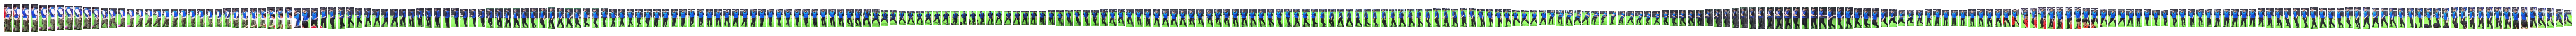

In [11]:
track_id=104
fig=plt.figure()
ax_list=[fig.add_subplot(1,len(track_id_dict[track_id]),i) for i in range(1,len(track_id_dict[track_id])+1)]
frame_nums=list(track_id_dict[track_id].keys())
print(track_id)
print(frame_nums)
for i in range(len(track_id_dict[track_id])):
    key=frame_nums[i]
    img=track_id_dict[track_id][key]
    ax_list[i].imshow(img)
    ax_list[i].axis('off')
plt.show()